__Introduction__

The goal of this project was for me to produce a metric that could in some way measure the quality of any given neighborhood in Pittsburgh. After scrolling through various datasets on WPRDC, I came across an EMS calls dataset which happened to include a "short description" of each call made to Emergency Services from 2019 to 2020. I decided I would care greatly about the number of reported assaults in a neighborhood when deciding whether or not I would like to live there, so I decided to filter the data to calls only regarding "assault". With this new, filtered dataset, I was able to create a very nice graph that ranks each Pittsburgh neighborhood by their respective frequency of assaults-caused calls. I briefly considered other events described in the EMS csv like arson and burglary, but I decided that assault was the most important.

**Metric**

The specific metric I have created displays the number of calls to Emergency Services regarding "assault" per 1000 people in each neighborhood in Pittsburgh. I used two datasets to produce this graph, https://data.wprdc.org/dataset/allegheny-county-911-dispatches-ems-and-fire/resource/ff33ca18-2e0c-4cb5-bdcd-60a5dc3c0418, and https://data.wprdc.org/dataset/2020-census-redistricting-data-extracts/resource/fb2cb765-458c-4deb-8252-0a18d7ce9a78. 

**Potential Shortcomings**

Although this graph *is* weighted by population, neighborhoods with small populations will have less meaningful results since they will have a smaller sample size. Also, neighborhoods with *no* assaults calls are not included in the list.

/var/folders/d4/kz3f457s1vz29p6p82_m23z40000gn/T/ipykernel_50310/3987939876.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12.030252740260677' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  value_counts[city[0]] = 1000*(value_counts[city[0]]/sm)


1. SEWICKLEY:0.04205568172260073
2. FRANKLIN PARK:0.2584146262678468
3. LEET:0.35893754486719315


<Axes: xlabel='Municipality (2019-2020)', ylabel='Assaults per 1000 people'>

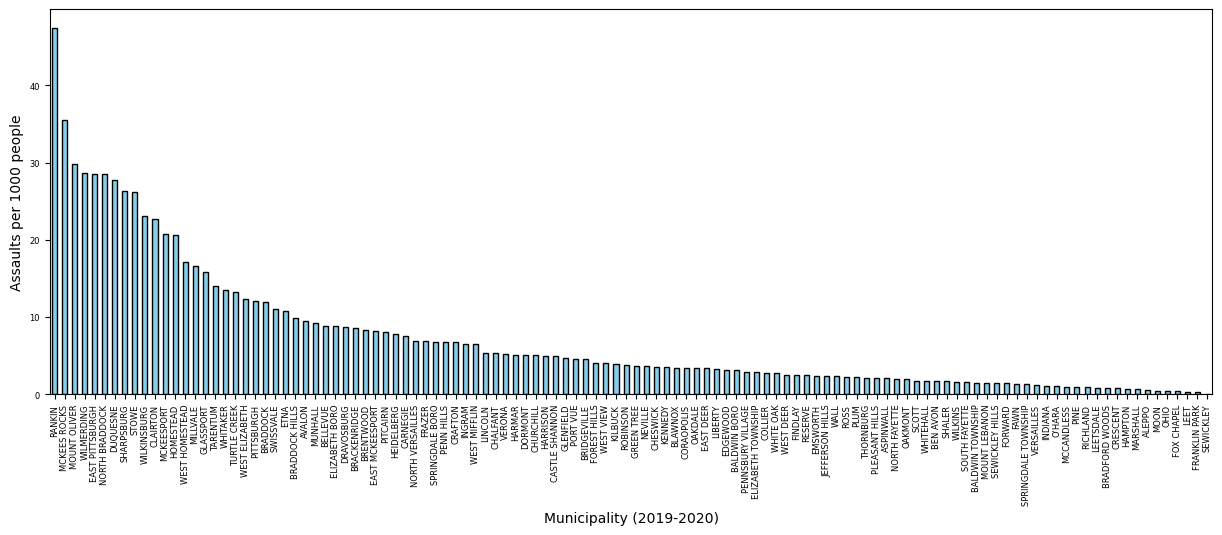

In [59]:
import pandas as pd

ASSAULT = pd.read_csv("data12.csv")
value_counts = ASSAULT['city_name'].value_counts()
POP = pd.read_csv("countysubdivisions_pittsburghmsa_20102020_pl171v2 (1).csv")
count = 0;
for city in value_counts.items():
    Pop_query = POP['NAME'].str.contains(city[0], case=False)
    temp = POP[Pop_query]
    sm = temp['2020_Total_Population'].sum()
    if (sm!=0):
        value_counts[city[0]] = 1000*(value_counts[city[0]]/sm)
        count = count + 1
value_counts.drop(labels=["EAST PITTSBURGH"])
value_counts = value_counts.sort_values(ascending=False)
print("1. SEWICKLEY:" + str(value_counts["SEWICKLEY"]))
print("2. FRANKLIN PARK:" + str(value_counts["FRANKLIN PARK"]))
print("3. LEET:" + str(value_counts["LEET"]))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(15, 5), fontsize=6, xlabel='Municipality (2019-2020)', ylabel="Assaults per 1000 people")
